In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Load the Excel file directly from Drive
file_path = '/content/drive/MyDrive/Online Retail.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')  # Use 'xlrd' if it's .xls
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Drop rows with missing CustomerID
df.dropna(subset=["CustomerID"], inplace=True)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Add TotalAmount column
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalamount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
import sqlite3

# Connect to SQLite (local runtime DB)
conn = sqlite3.connect("retail.db")

# Load DataFrame into SQLite
df.to_sql("sales_data", conn, if_exists='replace', index=False)


406829

In [9]:
query1 = """
SELECT customerid, ROUND(SUM(totalamount), 2) as revenue
FROM sales_data
GROUP BY customerid
ORDER BY revenue DESC
LIMIT 5;
"""

pd.read_sql_query(query1, conn)


,customerid,revenue
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45


from matplotlib import pyplot as plt
_df_0['customerid'].plot(kind='hist', bins=20, title='customerid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='customerid', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['customerid'].plot(kind='line', figsize=(8, 4), title='customerid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
query2 = """
SELECT country, ROUND(SUM(totalamount), 2) as total_revenue
FROM sales_data
GROUP BY country
ORDER BY total_revenue DESC
LIMIT 10;
"""

pd.read_sql_query(query2, conn)


,country,total_revenue
0,United Kingdom,6767873.39
1,Netherlands,284661.54
2,EIRE,250285.22
3,Germany,221698.21
4,France,196712.84
5,Australia,137077.27
6,Switzerland,55739.40
7,Spain,54774.58
8,Belgium,40910.96
9,Sweden,36595.91


In [11]:
query3 = """
SELECT description, SUM(quantity) as total_quantity
FROM sales_data
GROUP BY description
ORDER BY total_quantity DESC
LIMIT 10;
"""

pd.read_sql_query(query3, conn)


,description,total_quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1,JUMBO BAG RED RETROSPOT,45066
2,ASSORTED COLOUR BIRD ORNAMENT,35314
3,WHITE HANGING HEART T-LIGHT HOLDER,34147
4,PACK OF 72 RETROSPOT CAKE CASES,33409
5,POPCORN HOLDER,30504
6,RABBIT NIGHT LIGHT,27094
7,MINI PAINT SET VINTAGE,25880
8,PACK OF 12 LONDON TISSUES,25321
9,PACK OF 60 PINK PAISLEY CAKE CASES,24163


/tmp/ipython-input-12-1278605866.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="country", data=revenue_country, palette="Blues_d")


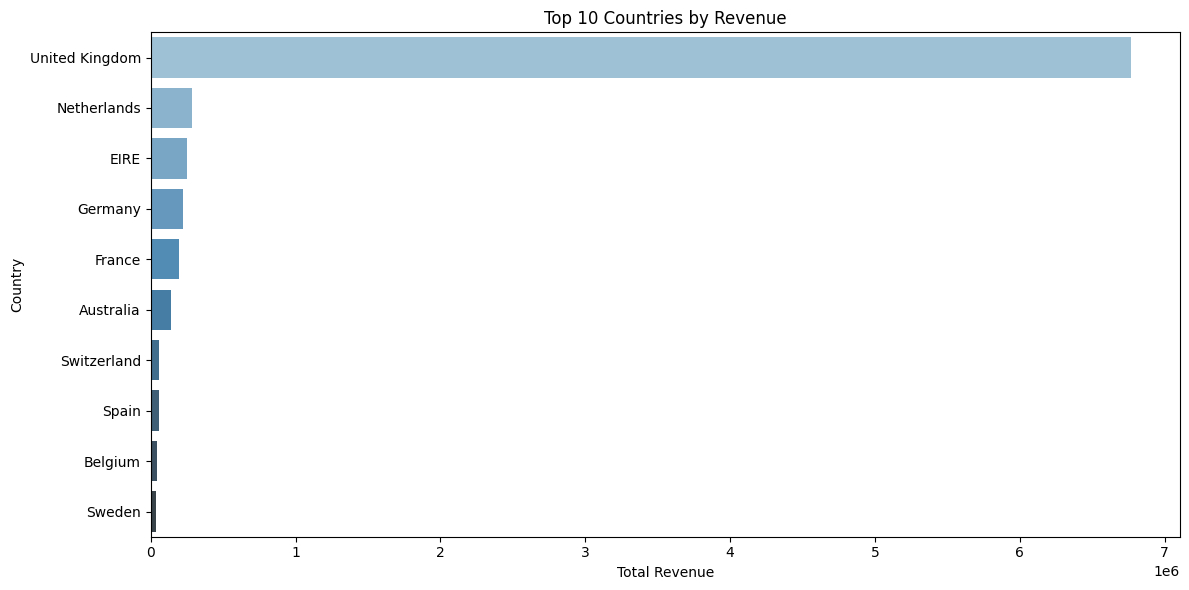

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query revenue by country
revenue_country = pd.read_sql_query("""
    SELECT country, SUM(totalamount) as revenue
    FROM sales_data
    GROUP BY country
    ORDER BY revenue DESC
    LIMIT 10
""", conn)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="revenue", y="country", data=revenue_country, palette="Blues_d")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-589226949.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_quantity", y="description", data=top_products, palette="Greens_d")


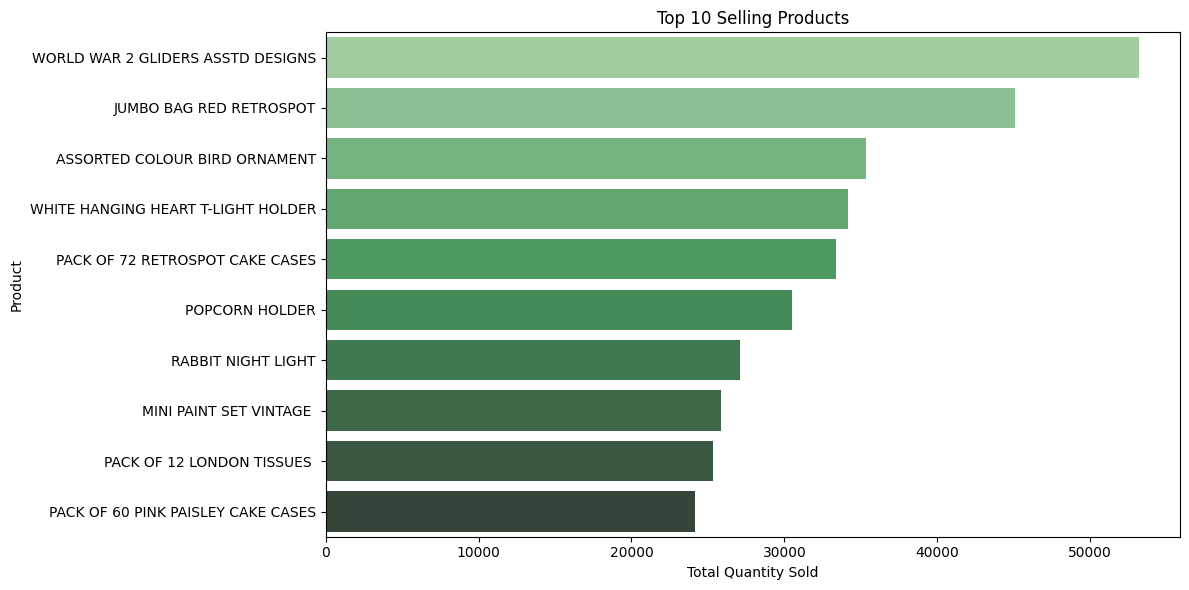

In [13]:
top_products = pd.read_sql_query("""
    SELECT description, SUM(quantity) as total_quantity
    FROM sales_data
    GROUP BY description
    ORDER BY total_quantity DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(12, 6))
sns.barplot(x="total_quantity", y="description", data=top_products, palette="Greens_d")
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-820960880.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customerid", y="total_spent", data=top_customers, palette="Oranges_d")


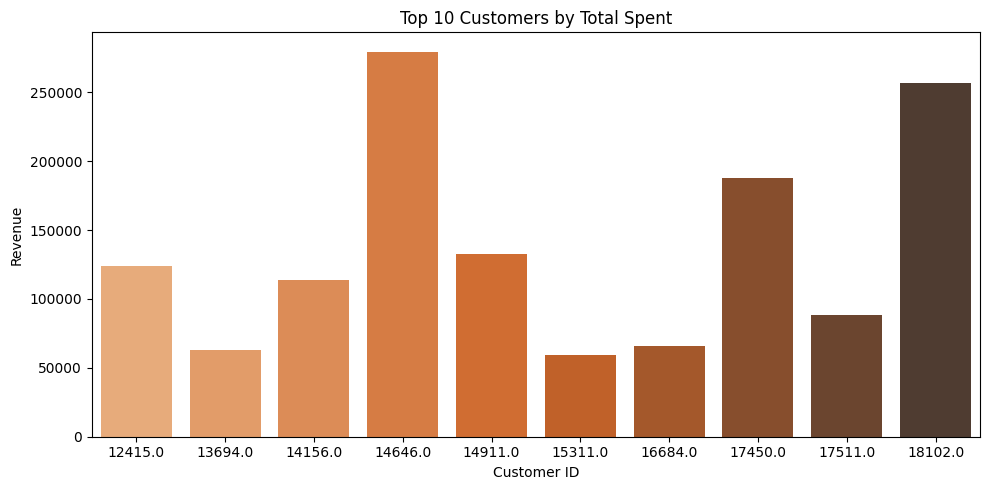

In [14]:
top_customers = pd.read_sql_query("""
    SELECT customerid, SUM(totalamount) as total_spent
    FROM sales_data
    GROUP BY customerid
    ORDER BY total_spent DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(10, 5))
sns.barplot(x="customerid", y="total_spent", data=top_customers, palette="Oranges_d")
plt.title("Top 10 Customers by Total Spent")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [15]:
# Collect data for report
total_rows = df.shape[0]
unique_customers = df["customerid"].nunique()
unique_products = df["description"].nunique()
total_revenue = df["totalamount"].sum()

top_country = revenue_country.iloc[0]["country"]
top_product = top_products.iloc[0]["description"]

# Create report content
report = f"""
🛒 Retail Sales Report
========================

📦 Total Transactions: {total_rows}
🧑‍💼 Unique Customers: {unique_customers}
📄 Unique Products Sold: {unique_products}
💰 Total Revenue: £{round(total_revenue, 2)}

🌍 Top Country by Revenue: {top_country}
🏆 Top Selling Product: {top_product}

✅ Insights:
- Most sales come from {top_country}
- The best-selling product is "{top_product}"
- Business can focus on top 10 countries and products for maximum gain

"""

# Save report to .txt file
with open("Retail_Sales_Report.txt", "w") as file:
    file.write(report)

# Download the report
from google.colab import files
files.download("Retail_Sales_Report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>